In [197]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-dataset/amazon.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [278]:
df = pd.read_csv('/kaggle/input//amazon-sales-dataset/amazon.csv')

In [279]:
df.shape

(1465, 16)

In [280]:
#Removal of Nan value rows
df = df.dropna()

In [281]:
df.shape

(1463, 16)

In [282]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


**Cleaning and Converting Data of following columns into Numerical format**
1. Discounted price
2. Actual Price
3. Discount percentage
4. Ratings
5. Rating count

In [283]:
replacement = {'₹':'', ",":""}
df['discounted_price'] = df['discounted_price'].replace(replacement,regex = True)
df['discounted_price'] = df['discounted_price'].apply(lambda x:float(x))

In [284]:
replacement = {'₹':'', ",":""}
df['actual_price'] = df['actual_price'].replace(replacement,regex = True)
df['actual_price'] = df['actual_price'].apply(lambda x:float(x))

In [285]:
df['discount_percentage'] = df['discount_percentage'].str.replace("%","")
df['discount_percentage'] = df['discount_percentage'].apply(lambda x:int(x))

In [286]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [287]:
df[df['rating']=='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [288]:
# I used Unique method and I found '|' in data. I replaced '|' to 0
df['rating'] = df['rating'].str.replace('|',"0")
df['rating'] = df['rating'].apply(lambda x:float(x))

In [289]:
#replacing the 0 value by mean value
df.at[1279,'rating']=df.rating.mean()

In [290]:
df['rating'].unique()

array([4.2       , 4.        , 3.9       , 4.1       , 4.3       ,
       4.4       , 4.5       , 3.7       , 3.3       , 3.6       ,
       3.4       , 3.8       , 3.5       , 4.6       , 3.2       ,
       5.        , 4.7       , 3.        , 2.8       , 3.1       ,
       4.8       , 2.3       , 4.09391661, 2.        , 2.6       ,
       2.9       ])

In [291]:
df['rating_count'] = df['rating_count'].str.replace(',',"")
df['rating_count'] = df['rating_count'].apply(lambda x:int(x))

In [292]:
# Creating the list of Categorical columns and Numerical columns
categorical_columns = [column for column in df.columns if df[column].dtype == "object"]
numerical_columns = [column for column in df.columns if df[column].dtype != "object"]

**1. What is the average rating for each product category**

In [293]:
# Product category wise average rating. There are 211 product categories
df1 = df.groupby('category')['rating'].mean()
df2 = pd.DataFrame(df1).reset_index()
df2.head()

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.80
1,Computers&Accessories|Accessories&Peripherals|...,4.15
2,Computers&Accessories|Accessories&Peripherals|...,3.50
3,Computers&Accessories|Accessories&Peripherals|...,3.60
4,Computers&Accessories|Accessories&Peripherals|...,4.05


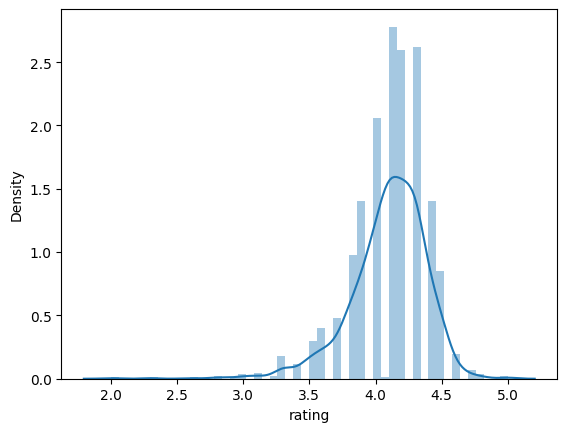

In [294]:
#Distribution of average ratings
sns.distplot(df.rating)
plt.show()

**2. What are the top rating_count products by category**

In [295]:
df1 = df[['product_name','category','rating_count' ]]
top_products_by_category = df1.groupby('category').apply(lambda x: x.nlargest(5, 'rating_count'))

# Reset index to flatten the DataFrame
top_products_by_category1 = top_products_by_category.reset_index(drop=True)

# Display the top-rated products by category
print(top_products_by_category1)

                                          product_name  \
0    Reffair AX30 [MAX] Portable Air Purifier for C...   
1    rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
2    Kanget [2 Pack] Type C Female to USB A Male Ch...   
3    Hp Wired On Ear Headphones With Mic With 3.5 M...   
4    JBL Commercial CSLM20B Auxiliary Omnidirection...   
..                                                 ...   
588  Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
589     Pentonic Multicolor Ball Point Pen, Pack of 10   
590  Parker Vector Standard Chrome Trim Ball Pen (I...   
591  Parker Vector Camouflage Gift Set - Roller Bal...   
592  Faber-Castell Connector Pen Set - Pack of 25 (...   

                                              category  rating_count  
0    Car&Motorbike|CarAccessories|InteriorAccessori...          1118  
1    Computers&Accessories|Accessories&Peripherals|...          4426  
2    Computers&Accessories|Accessories&Peripherals|...          1540  
3    Computers&Acce

**3. What is the distribution of discounted prices vs. actual prices**

1. Scatter plot shows the direct relation(Directly proportional)
2. Suppliers are showing high prices and giving high discount(Marketing strategy)



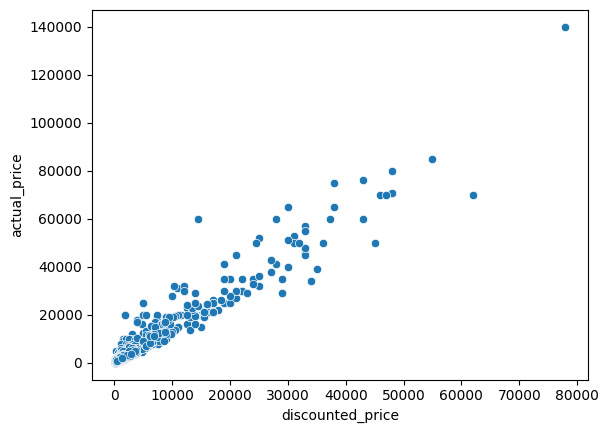

In [296]:
df1 = df[['discounted_price','actual_price','discount_percentage']]
sns.scatterplot(df1,x = 'discounted_price', y = 'actual_price' )
plt.show()

**4. How does the average discount percentage vary across categories?**

Conclusion - 
1. Range of discount is 0% - 90%
2. from violin plot we can understand that maximum product categories provide discount 30 - 70%

minimum categori wise discount percentage 0.0
maximum categori wise discount percentage 90.0
maximum categori wise discount percentage 43.447514689596495


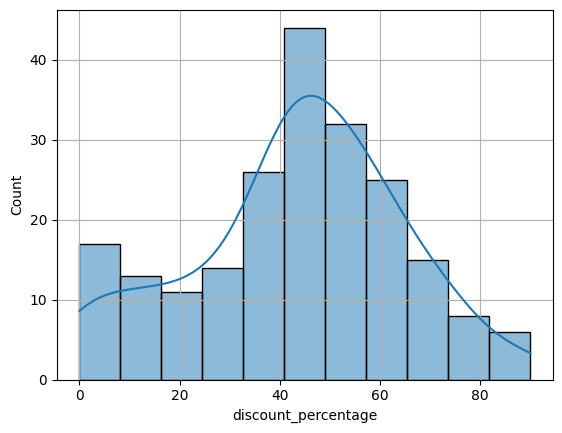

In [297]:
#Distribution of average discount percentage for category wise data

df1 = df[['category','discount_percentage']]
discount_percentage_mean = df1.groupby('category')['discount_percentage'].mean()
print('minimum categori wise discount percentage', discount_percentage_mean.min())
print('maximum categori wise discount percentage', discount_percentage_mean.max())
print('maximum categori wise discount percentage', discount_percentage_mean.mean())
sns.histplot(discount_percentage_mean, kde = True)
plt.grid(True)

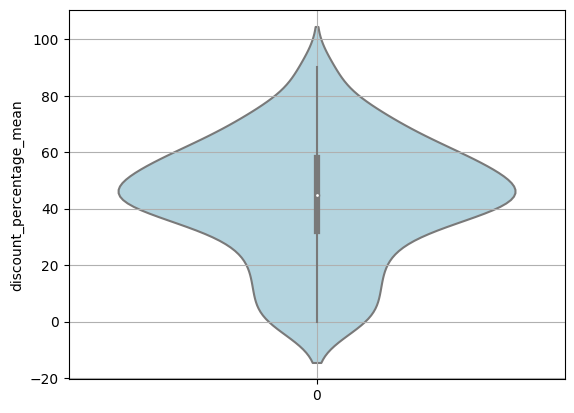

In [298]:
#Distribution of average discount percentage for category wise data
sns.violinplot(discount_percentage_mean, color = 'lightblue')
plt.ylabel('discount_percentage_mean')
plt.grid(True)

<Axes: ylabel='discount_percentage'>

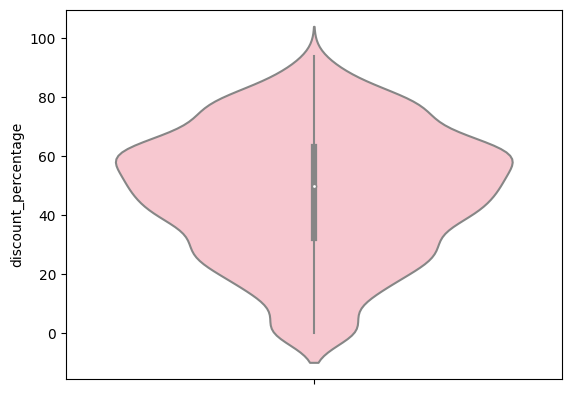

In [299]:
#Distribution of discount_percentage for all data
sns.violinplot(df1, y = 'discount_percentage',color = 'pink')

<Axes: xlabel='discount_percentage', ylabel='Count'>

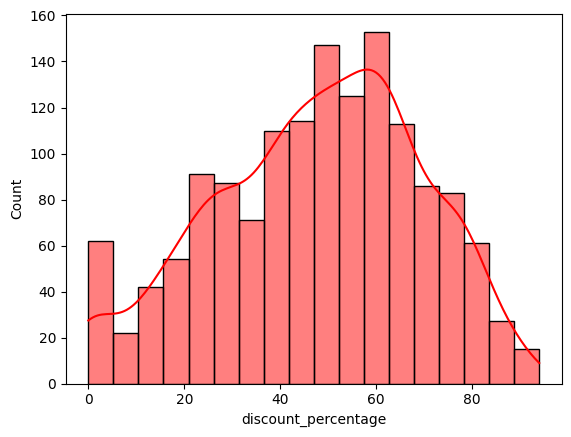

In [300]:
#Distribution of discount_percentage for all data
sns.histplot(df1['discount_percentage'],kde = True,color = 'r')

 5. What are the most popular product names?
*  Popular product is the product has maximum rating

In [301]:
df1 = df[['product_id','product_name','rating']]
most_popular_product_table = df1.sort_values(by = 'rating', ascending = False).head(10)
most_popular_product_list = most_popular_product_table['product_name'].to_list()
most_popular_product_id_list = most_popular_product_table['product_id'].to_list()
# Following is the list of top 10 popular products
most_popular_product_list

['Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop',
 'Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)',
 'Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)',
 'Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)',
 'Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))',
 'FIGMENT Hand

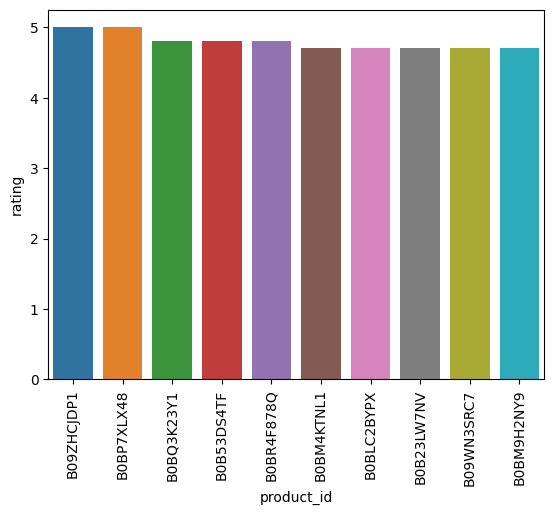

In [302]:
# Bar plot of the most_popular_products by product_id
sns.barplot(most_popular_product_table, x = 'product_id', y = 'rating')
plt.xticks(rotation = 90)
plt.show()

 6. What are the most popular product keywords?
 
1. Product keywords on Amazon refer to the specific words or phrases that sellers use to optimize their product listings and make their products more discoverable to potential customers. These keywords are crucial for improving the visibility of products in Amazon search results and increasing the likelihood of attracting relevant traffic.

1. When sellers create product listings on Amazon, they include keywords in various fields such as the product title, bullet points, description 

1. As per above guidlines we can find the most popular product keywords in product_name and about_product columns

In [303]:
product_name_list = df.product_name.to_list()
about_product_list = df.product_name.to_list()
#Creating the list of product name and product description strings
data_list = product_name_list + about_product_list

Steps to clean the data using NLTK
1. I used NLTK library to clean the data
2. cleaned the stop words
3. cleaned the puctuations
4. clened the strings which are only contans digits

In [304]:
#Importing the required libraries and modules
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [305]:
# Creating the function to clean data
# Stopwords are that words which dose not contains any information like 'to','from'etc.
stop_words = set(stopwords.words('english'))


# This function reruns the clean list of words by removing stopwords
def Clean_text(text):
  # tokanisation of text/string data into words
  tokens = word_tokenize(text)
  #Removal of punctuations from tokens
  tokens_without_punctuation = [word for word in tokens if word not in string.punctuation]
  #Removal of stop words
  filtered_words = [word for word in tokens_without_punctuation if word.lower() not in stop_words]
  #removing words which contains only digits
  filtered_words = [word for word in filtered_words if not word.isdigit()]
  return filtered_words

**Plotting the bar plots of most popular product key words**
1. Creating the nested list of clean data
2. Creating the flatten list of clean words
3. Count the occurence of word
4. Creating the dictionari of words and number of occurences
5. plot the barplot of top 15 reviews which are most popular(having highest frequency)

In [306]:
#Creating list of words -->> creating list of word count -->> Creating dictionary of words as key and count as value
list_of_clean_words_nested =[Clean_text(data) for data in data_list ]   
list_of_clean_words_flatten = [word for str1 in list_of_clean_words_nested for word in str1]
Word_cout = [list_of_clean_words_flatten.count(word1) for word1 in list_of_clean_words_flatten]
Word_count_dict = dict(zip(list_of_clean_words_flatten,Word_cout))

In [307]:
#Sorting the dictionary in descending order to get top 15 most used key words
sorted_dict = dict(sorted(Word_count_dict.items(), key=lambda x: x[1], reverse=True)[:15])
sorted_dict.keys()

dict_keys(['Black', 'Cable', 'USB', 'Charging', 'Fast', 'C', 'Smart', 'White', 'Type', 'Compatible', 'Data', 'HD', 'TV', 'Wireless', 'LED'])

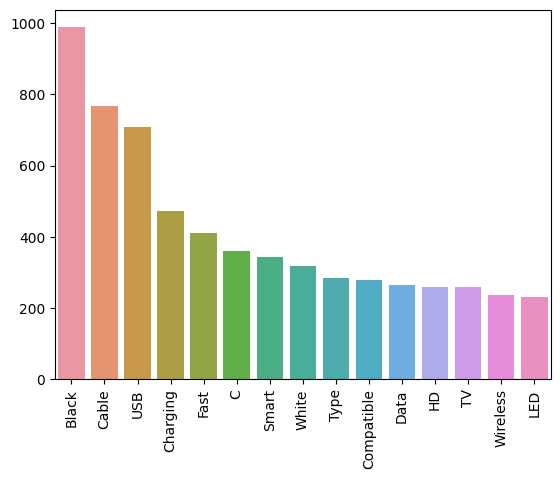

In [308]:
#Creating data frame and plotting bar graph for top 15 most popular product keywords
df3 = pd.DataFrame(sorted_dict,index = [0])
sns.barplot(df3)
plt.xticks(rotation = 90)
plt.show()

7, What are the most popular product reviews?
1. Convert the product reviews column to list
2. convert the string of product reviews in list of product review
3. Count the occurence of each review
4. plot the barplot of top 15 reviews which are most popular(having highest frequency)

In [309]:
list_of_product_review_nested = df.review_content.to_list()
list_of_reviews = [i.split(',') for i in list_of_product_review_nested]

In [310]:
from collections import Counter    # counter function count the occurences and return the dictionari

list_of_reviews = [i.split(',') for i in list_of_product_review_nested]
list_of_product_review_flatten = [comment for list1 in list_of_reviews  for comment in list1]
from collections import Counter

# Count the occurrences of each element
product_review_dict = Counter(list_of_product_review_flatten)
product_review_dict.pop('')
Product_review_dict_sorted = dict(sorted(product_review_dict.items(), key=lambda x: x[1], reverse=True)[:15])
Product_review_dict_sorted

{'Good': 378,
 'Good product': 189,
 'Nice': 121,
 'Nice product': 111,
 'Value for money': 95,
 'Ok': 60,
 'Good quality': 51,
 'Easy to use': 44,
 'good': 40,
 'Good one': 33,
 'Like': 31,
 'Very good': 24,
 'Very good product': 23,
 'I like this product': 21,
 'Very nice': 16}

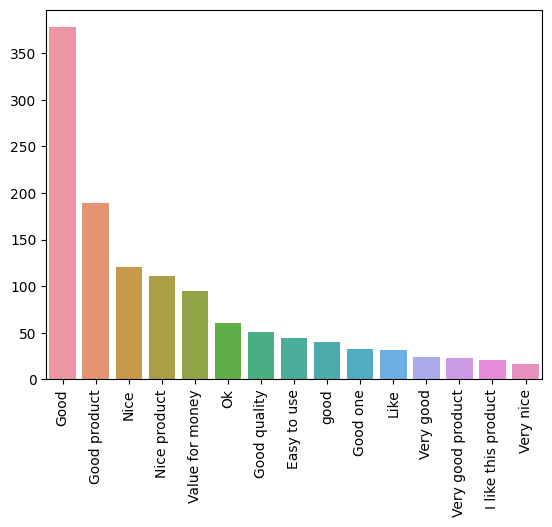

In [311]:
df4 = pd.DataFrame(Product_review_dict_sorted,index = [0])
sns.barplot(df4)
plt.xticks(rotation = 90)
plt.show()

8. What is the correlation between discounted_price and rating?

-->> correlation between discounted_price and rating is negligible 

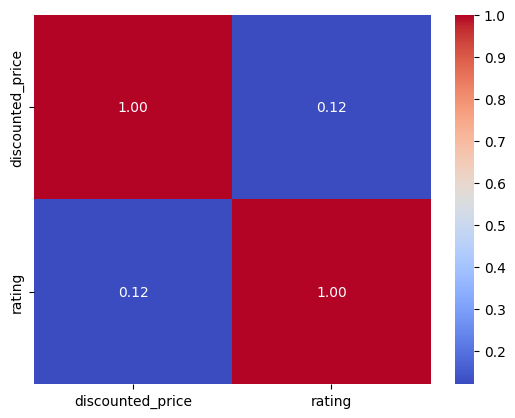

In [312]:
df1 = df[['discounted_price', 'rating']]
corelate = df1.corr()
sns.heatmap(corelate, annot = True, cmap = 'coolwarm',fmt = '.2f')
plt.show()

**9. What are the Top 5 categories based on the highest ratings?**

1. Create the new series object with groupby category column with mean of ratings
2. sort the data in descending order and plot the graph.

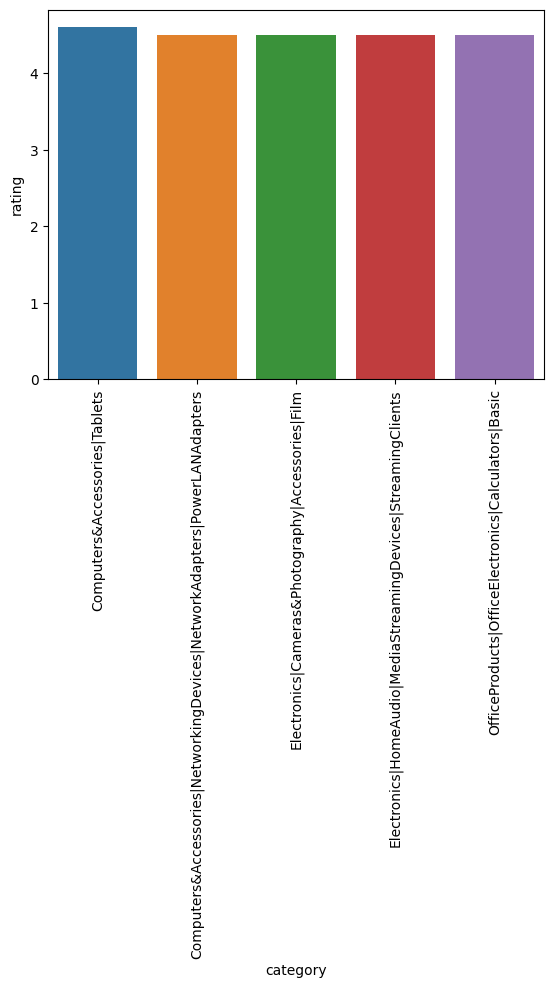

In [313]:
df1 = df.groupby('category')['rating'].mean()
df1 = df1.sort_values(ascending = False)
df2 = pd.DataFrame(df1).head(5)
sns.barplot(df2,y = df2.rating, x = df2.index)
plt.xticks(rotation = 90)
plt.show()

**10. Identify any potential areas for improvement or optimization based on the data analysis.**


1.Average rating of the all products is 4.09, it shows the amazon sales(keep in stock) quality products

2.Minimum rating product id is 	B0BPJBTB3F, Need to improve quality to improve service

3.Scatter plot shows the direct relation(Directly proportional) between discount price and actual price. 

4.suppliers are showing high prices of products to show the high discount(Marketing strategy)

5.Range of discount is 0 - 90%

6.Average discount is 43.4%, which is very high. Some suppliers are giving high discount to attract the customers

7.List of most popular products - 
* 'B09ZHCJDP1',
* 'B0BP7XLX48',
* 'B0BQ3K23Y1',
* 'B0B53DS4TF',
* 'B0BR4F878Q',
* 'B0BM4KTNL1',
* 'B0BLC2BYPX',
* 'B0B23LW7NV',
* 'B09WN3SRC7',
* 'B0BM9H2NY9'

8**.List of most popular product keys - ['Black', 'Cable', 'USB', 'Charging', 'Fast', 'C', 'Smart', 'White', 'Type', 'Compatible', 'Data', 'HD', 'TV', 'Wireless', 'LED'] Amazon should keep the stock of all the products which contains popular product keys. It can improve the sale.**

9.Corelation between discounted price and rating is 0.11, shows customers are not giving ratings only considering discounted price, it shows customer awareness.

10.Top 5 category based on highest ratings -
* 'Computers&Accessories|Tablets',
* 'Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters',
* 'Electronics|Cameras&Photography|Accessories|Film',
* 'Electronics|HomeAudio|MediaStreamingDevices|StreamingClients'
* 'OfficeProducts|OfficeElectronics|Calculators|Basic'